In [1]:
import pandas as pd
import numpy as np
import statistics
import sklearn.metrics
import warnings
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
warnings.filterwarnings("ignore")

In [2]:
def get_accuracy(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    num_correct_ann= annotation_df[annotation_df[correct_id_col]==annotation_df[predicted_id_col]].shape[0]
    acc=num_correct_ann/annotation_df.shape[0]
    return acc

In [3]:
def get_balanced_accuracy_verbose(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    ann=[]
    for cell_type in sorted(set(annotation_df[correct_id_col])):
        cell_type_sub = annotation_df[annotation_df[correct_id_col]==cell_type]
        print(cell_type)
        num_cells =cell_type_sub.shape[0]
        print("predicted cell ID")
        num_correct_ann = cell_type_sub[cell_type_sub[predicted_id_col]==cell_type].shape[0]
        #print(cell_type_sub.predicted_cellID.value_counts())
        perc=(num_correct_ann/num_cells)
        print(perc)
        ann.append(perc)
    balanced_accuracy= np.sum(ann)/len(ann)
    print("balanced accuracy:")
    print(balanced_accuracy)
    return balanced_accuracy

In [4]:
def get_balanced_accuracy(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    ann=[]
    for cell_type in sorted(set(annotation_df[correct_id_col])):
        cell_type_sub = annotation_df[annotation_df[correct_id_col]==cell_type]
        num_cells =cell_type_sub.shape[0]
        num_correct_ann = cell_type_sub[cell_type_sub[predicted_id_col]==cell_type].shape[0]
        #print(cell_type_sub.predicted_cellID.value_counts())
        perc=(num_correct_ann/num_cells)
        ann.append(perc)
    balanced_accuracy= np.sum(ann)/len(ann)
    return balanced_accuracy

In [5]:
def get_cluster_accuracy(annotation_df, cluster_id_column ='clust',correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    correc_ann_counter=0
    annotation_df = annotation_df.groupby(cluster_id_column).filter(lambda x: len(x) > 10)
    cluster_ids =sorted(set(annotation_df[cluster_id_column]))
    for cluster_id in cluster_ids:
        cluster_sub = annotation_df[annotation_df[cluster_id_column]==cluster_id]   
        clust_real_id_counts = cluster_sub[correct_id_col].value_counts()
        # sort fist by number then by index, then get the cell type with the highest occurance. This takes care of ties
        clust_real_id = clust_real_id_counts.iloc[np.lexsort((clust_real_id_counts.index, -clust_real_id_counts.values))].index[0]
        clust_predicted_id_counts = cluster_sub[predicted_id_col].value_counts()
        # sort fist by number then by index, then get the cell type with the highest occurance. This takes care of ties
        clust_predicted_id = clust_predicted_id_counts.iloc[np.lexsort((clust_predicted_id_counts.index, -clust_predicted_id_counts.values))].index[0]
        if clust_real_id == clust_predicted_id:
            correc_ann_counter += 1
        else:
            continue
    clust_accuracy= correc_ann_counter/len(cluster_ids)
    return clust_accuracy

In [6]:
def get_cohens_kappa_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    cohens_kappa_score= sklearn.metrics.cohen_kappa_score(annotation_df[correct_id_col],annotation_df[predicted_id_col])
    return(cohens_kappa_score)

In [7]:
def get_F1_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    F1_list=[]
    for cell_type in sorted(set(annotation_df[correct_id_col])):
        # subset dataframe to the cell-type of interest 
        # then convert df labels to binary classification tasks
        cell_type_sub = annotation_df[(annotation_df[correct_id_col]==cell_type) | (annotation_df[predicted_id_col]==cell_type)]
        #cell_type_sub = cell_type_sub[[correct_id_col, predicted_id_col]]
        cell_type_sub[correct_id_col] = cell_type_sub[correct_id_col].where(cell_type_sub[correct_id_col].isin([cell_type]), 'other')
        cell_type_sub[predicted_id_col] = cell_type_sub[predicted_id_col].where(cell_type_sub[predicted_id_col].isin([cell_type]), 'other')
        F1_cell_type = sklearn.metrics.f1_score(cell_type_sub[correct_id_col], cell_type_sub[predicted_id_col], pos_label = cell_type)
        F1_list.append(F1_cell_type)
    return(F1_list)

In [8]:
def get_macroF1_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID', label_list=None):
    if label_list ==None:
        label_list  = annotation_df[correct_id_col].value_counts().index   
    macroF1_score = sklearn.metrics.f1_score(annotation_df[correct_id_col], annotation_df[predicted_id_col],average='macro', labels=label_list)
    return(macroF1_score)


In [9]:
def get_medianF1_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    F1_scores = get_F1_score(annotation_df, correct_id_col=correct_id_col, predicted_id_col=predicted_id_col)
    medianF1_score = statistics.median(F1_scores)
    return(medianF1_score)

In [10]:
def get_precision_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    precision_list=[]
    for cell_type in sorted(set(annotation_df[correct_id_col])):
        # subset dataframe to the cell-type of interest
        cell_type_sub = annotation_df[(annotation_df[correct_id_col]==cell_type) | (annotation_df[predicted_id_col]==cell_type)]
        cell_type_sub[correct_id_col] = cell_type_sub[correct_id_col].where(cell_type_sub[correct_id_col].isin([cell_type]), 'other')
        cell_type_sub[predicted_id_col] = cell_type_sub[predicted_id_col].where(cell_type_sub[predicted_id_col].isin([cell_type]), 'other')
        precision_cell_type = sklearn.metrics.precision_score(cell_type_sub[correct_id_col], cell_type_sub[predicted_id_col], pos_label = cell_type)
        precision_list.append(precision_cell_type)
    return(precision_list)

In [11]:
def get_medianPrecision_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    precision_scores = get_precision_score(annotation_df, correct_id_col=correct_id_col, predicted_id_col=predicted_id_col)
    medianPrecision_score = statistics.median(precision_scores)
    return(medianPrecision_score)

In [12]:
def get_recall_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    recall_list=[]
    for cell_type in sorted(set(annotation_df[correct_id_col])):
        # subset dataframe to the cell-type of interest
        cell_type_sub = annotation_df[(annotation_df[correct_id_col]==cell_type) | (annotation_df[predicted_id_col]==cell_type)]
        cell_type_sub[correct_id_col] = cell_type_sub[correct_id_col].where(cell_type_sub[correct_id_col].isin([cell_type]), 'other')
        cell_type_sub[predicted_id_col] = cell_type_sub[predicted_id_col].where(cell_type_sub[predicted_id_col].isin([cell_type]), 'other')
        recall_cell_type = sklearn.metrics.recall_score(cell_type_sub[correct_id_col], cell_type_sub[predicted_id_col], pos_label = cell_type)
        recall_list.append(recall_cell_type)
    return(recall_list)

In [13]:
def get_medianRecall_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    recall_scores = get_recall_score(annotation_df, correct_id_col=correct_id_col, predicted_id_col=predicted_id_col)
    medianPrecision_score = statistics.median(recall_scores)
    return(medianPrecision_score)

In [14]:
def get_adjusted_rand_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    adjusted_rand_score= sklearn.metrics.adjusted_rand_score(annotation_df[correct_id_col],annotation_df[predicted_id_col])
    return(adjusted_rand_score)

In [15]:
def get_mathews_corr_coef_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    matthews_corrcoef_score= sklearn.metrics.matthews_corrcoef(annotation_df[correct_id_col],annotation_df[predicted_id_col])
    return(matthews_corrcoef_score)

In [16]:
def get_common_cells(*dataframes):
    df_cell_list = [v.index for v in dataframes]
    common_cells= list(set.intersection(*map(set,df_cell_list)))
    return(common_cells)

In [17]:
def get_combined_annotations_df_for_common_cells(*frames, common_cells, cell_ID_column="cell_IDs"):
    if not frames:
        return None
    if len(frames) == 1:
        return frames[0]
    
    from itertools import chain
    suffixes = [f"_merge{i}" for i in range(len(frames))]

    out = frames[0].loc[common_cells,]
    for i, df in enumerate(frames[1:], start=1):
        suffix = (suffixes[i-1], suffixes[i]) if i < len(suffixes) else ('_x', '_y')
        out = out.merge(df.loc[common_cells,], on=cell_ID_column, suffixes=suffix)
    
    return out

In [18]:
def plot_performance_metrics(df , colors=None, labels = None, y_min = 0.0, frame_color = 'gray', frame_width = 0.5, x_label_rotation = 45, tick_size = 14,legend_fontsize = 12,
                            legend_labels = None, legend_loc = 'upper center', legend_bbox_to_anchor=(0.5, -0.2), legend_ncol=4, save=False, save_path=None):

    # Default values
    default_colors = ['#5E0B8A', '#00A7E1', '#BDDA57', '#FF8C00']
    default_labels = ['accuracy', 'balanced \naccuracy','cluster \naccuracy', 'macro \nF1', 'median \nF1',
                      'median \nprecision', 'median \nrecall','MCC', 'ARI', "Cohen's \nkappa"]
    default_legend_labels =['scATAcat', 'Seurat label transfer', 'Cellcano', 'EpiAnno']

    # Use default if None is passed
    colors = default_colors if colors is None else colors
    labels = default_labels if labels is None else labels
    legend_labels = default_legend_labels if legend_labels is None else legend_labels
  
    df.columns = labels
    df.index = legend_labels
    
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42

    n_bins = 100  # Increase this number for a smoother gradient
    cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=n_bins)
    ax = df.T.plot(kind='bar', figsize=(15, 10), legend=True, fontsize=12, colormap=cmap)
    ax.set_ylim(ymin=y_min)
    # Change plot frame to gray and adjust linewidth
    spine_color = 'gray'
    linewidth = frame_width # Adjust the linewidth as needed
    for spine in ax.spines.values():
        spine.set_color(spine_color)
        spine.set_linewidth(linewidth)
    ax.legend(legend_labels,fontsize=legend_fontsize, loc=legend_loc, bbox_to_anchor=legend_bbox_to_anchor,
          fancybox=False, shadow=False, ncol=legend_ncol, frameon=False)
    plt.xticks(rotation=x_label_rotation)
    plt.tick_params(axis='both', which='major', labelsize=tick_size)

    if save == False:
        plt.show()
    else:
        if save_path == None:
            print("specify the save_path directory")
        else:
            plt.savefig(save_path, bbox_inches='tight', transparent=True)

### scATAcat annotations

In [19]:
data_dir = "../../../../../../results/Supplementary_tables/analysis_on_different_projections/FACS_BM_scATAC/application_with_Corces2016_prototypes/"
leiden_key = 'leiden_1.0'

In [20]:
projection_with_pseudobulk_PCs_prototype_features = pd.read_csv(data_dir +"projection_with_pseudobulk_PCs_prototype_features/outputs/scATAcat_annotations.csv")
projection_with_pseudobulk_PCs_prototype_features.columns = ['cell_IDs',leiden_key, 'projection_with_pseudobulk_PC' ,'ground_truth_annotations']
projection_with_pseudobulk_PCs_prototype_features.index = projection_with_pseudobulk_PCs_prototype_features.cell_IDs
projection_with_pseudobulk_PCs_prototype_features.index.name = None
projection_with_pseudobulk_PCs_prototype_features = projection_with_pseudobulk_PCs_prototype_features.replace('HSC', 'HSC/MPP')
projection_with_pseudobulk_PCs_prototype_features = projection_with_pseudobulk_PCs_prototype_features.replace('MPP', 'HSC/MPP')
projection_with_pseudobulk_PCs_prototype_features.head()

,cell_IDs,leiden_1.0,projection_with_pseudobulk_PC,ground_truth_annotations
CLP_1,CLP_1,8,CLP,CLP
CMP_0,CMP_0,4,CMP,CMP
CMP_1,CMP_1,4,CMP,CMP
CMP_2,CMP_2,1,CMP,CMP
CMP_3,CMP_3,6,MEP,CMP


In [21]:
projection_with_prototype_PCs_prototype_features = pd.read_csv(data_dir +"projection_with_prototype_PCs_prototype_features/outputs/scATAcat_annotations.csv")
projection_with_prototype_PCs_prototype_features.columns = ['cell_IDs',leiden_key, 'projection_with_prototype_PCs' ,'ground_truth_annotations']
projection_with_prototype_PCs_prototype_features.index = projection_with_prototype_PCs_prototype_features.cell_IDs
projection_with_prototype_PCs_prototype_features.index.name = None
projection_with_prototype_PCs_prototype_features = projection_with_prototype_PCs_prototype_features.replace('HSC', 'HSC/MPP')
projection_with_prototype_PCs_prototype_features = projection_with_prototype_PCs_prototype_features.replace('MPP', 'HSC/MPP')
projection_with_prototype_PCs_prototype_features.head()

,cell_IDs,leiden_1.0,projection_with_prototype_PCs,ground_truth_annotations
CLP_1,CLP_1,8,CLP,CLP
CMP_0,CMP_0,4,CMP,CMP
CMP_1,CMP_1,4,CMP,CMP
CMP_2,CMP_2,1,CMP,CMP
CMP_3,CMP_3,6,MEP,CMP


In [22]:
projection_with_PCs_from_both_prototype_features = pd.read_csv(data_dir +"projection_with_PCs_from_both_prototype_features/outputs/scATAcat_annotations.csv")
projection_with_PCs_from_both_prototype_features.columns = ['cell_IDs',leiden_key, 'projection_with_PCs_from_both' ,'ground_truth_annotations']
projection_with_PCs_from_both_prototype_features.index = projection_with_PCs_from_both_prototype_features.cell_IDs
projection_with_PCs_from_both_prototype_features.index.name = None
projection_with_PCs_from_both_prototype_features = projection_with_PCs_from_both_prototype_features.replace('HSC', 'HSC/MPP')
projection_with_PCs_from_both_prototype_features = projection_with_PCs_from_both_prototype_features.replace('MPP', 'HSC/MPP')
projection_with_PCs_from_both_prototype_features.head()

,cell_IDs,leiden_1.0,projection_with_PCs_from_both,ground_truth_annotations
CLP_1,CLP_1,8,CLP,CLP
CMP_0,CMP_0,4,CMP,CMP
CMP_1,CMP_1,4,CMP,CMP
CMP_2,CMP_2,1,CMP,CMP
CMP_3,CMP_3,6,MEP,CMP


In [23]:
projection_with_prototype_CC = pd.read_csv(data_dir +"projection_with_CCA_prototype_features/outputs/CCA_annotations_CCX.csv")
projection_with_prototype_CC.columns = ['cell_IDs',leiden_key, 'CC_prototype_annotation' ,'ground_truth_annotations']
projection_with_prototype_CC.index = projection_with_prototype_CC.cell_IDs
projection_with_prototype_CC.index.name = None
projection_with_prototype_CC = projection_with_prototype_CC.replace('HSC', 'HSC/MPP')
projection_with_prototype_CC = projection_with_prototype_CC.replace('MPP', 'HSC/MPP')
projection_with_prototype_CC.head()

,cell_IDs,leiden_1.0,CC_prototype_annotation,ground_truth_annotations
CLP_1,CLP_1,8,CLP,CLP
CMP_0,CMP_0,4,CMP,CMP
CMP_1,CMP_1,4,CMP,CMP
CMP_2,CMP_2,1,CMP,CMP
CMP_3,CMP_3,6,MEP,CMP


In [24]:
projection_with_pseudobulk_CC = pd.read_csv(data_dir +"projection_with_CCA_prototype_features/outputs/CCA_annotations_CCY.csv")
projection_with_pseudobulk_CC.columns = ['cell_IDs',leiden_key, 'CC_pseudobulk_annotation' ,'ground_truth_annotations']
projection_with_pseudobulk_CC.index = projection_with_prototype_CC.cell_IDs
projection_with_pseudobulk_CC.index.name = None
projection_with_pseudobulk_CC = projection_with_pseudobulk_CC.replace('HSC', 'HSC/MPP')
projection_with_pseudobulk_CC = projection_with_pseudobulk_CC.replace('MPP', 'HSC/MPP')

projection_with_pseudobulk_CC.head()

,cell_IDs,leiden_1.0,CC_pseudobulk_annotation,ground_truth_annotations
CLP_1,CLP_1,8,CLP,CLP
CMP_0,CMP_0,4,CMP,CMP
CMP_1,CMP_1,4,CMP,CMP
CMP_2,CMP_2,1,CMP,CMP
CMP_3,CMP_3,6,MEP,CMP


In [25]:

common_cells_across_methods = pd.read_csv("../../../../../../../results/Fig1_Fig2_Fig3_SFig1-FACS_BM_scATAC/compare_annotation_performances/commonCells.csv", index_col=False)
common_cells_across_methods.index  = common_cells_across_methods.iloc[:,0]
common_cells_across_methods.head()

,0
0,
MPP_103,MPP_103
MPP_186,MPP_186
HSC_278,HSC_278
CMP_401,CMP_401
CMP_173,CMP_173


## common cells and common annotations

In [26]:

scores_df = pd.DataFrame(index=["projection_with_prototype_PCs","projection_with_pseudobulk_PC", "projection_with_PCs_from_both", "projection_with_prototype_CC","projection_with_pseudobulk_CC" ],
                        columns=["accuracy","balanced_accuracy","cluster_accuracy","macroF1_score","medianF1_score","medianPrecision_score","medianRecall_score","mathews_corr_coef_score","adjusted_rand_score","cohens_kappa_score"])
common_cells = get_common_cells(
    projection_with_pseudobulk_PCs_prototype_features,
    projection_with_prototype_PCs_prototype_features, 
    projection_with_PCs_from_both_prototype_features,projection_with_prototype_CC,
    projection_with_pseudobulk_CC,common_cells_across_methods)
all_methods_for_commonCells = get_combined_annotations_df_for_common_cells(
    projection_with_pseudobulk_PCs_prototype_features,
    projection_with_prototype_PCs_prototype_features,
    projection_with_PCs_from_both_prototype_features,
    projection_with_prototype_CC,
    projection_with_pseudobulk_CC,
    common_cells=common_cells,
    cell_ID_column="cell_IDs"
)
common_annotations = list(set(projection_with_pseudobulk_PCs_prototype_features.projection_with_pseudobulk_PC)
                          &set(projection_with_PCs_from_both_prototype_features.projection_with_PCs_from_both)
                          &set(projection_with_prototype_PCs_prototype_features.projection_with_prototype_PCs)
                         &set(projection_with_prototype_CC.CC_prototype_annotation)
                         &set(projection_with_pseudobulk_CC.CC_pseudobulk_annotation))
print(common_annotations)
all_methods_for_commonCells_commonAnnotations = all_methods_for_commonCells[all_methods_for_commonCells.ground_truth_annotations.isin(common_annotations)]
annotation_df = all_methods_for_commonCells_commonAnnotations
correct_id_col = 'ground_truth_annotations'
cluster_id_column =leiden_key
for method in scores_df.index:
    if method == "projection_with_pseudobulk_PC":
        predicted_id_col = "projection_with_pseudobulk_PC"
        scores_df.loc["projection_with_pseudobulk_PC", "accuracy"] = get_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_PC", "balanced_accuracy"] = get_balanced_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_PC", "cluster_accuracy"] =  get_cluster_accuracy(annotation_df = annotation_df, cluster_id_column =cluster_id_column,correct_id_col=correct_id_col, predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_PC", "macroF1_score"] = get_macroF1_score(annotation_df = annotation_df, correct_id_col=correct_id_col, predicted_id_col=predicted_id_col, label_list=None)
        scores_df.loc["projection_with_pseudobulk_PC", "medianF1_score"] = get_medianF1_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_PC", "medianPrecision_score"] = get_medianPrecision_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_PC", "medianRecall_score"] =  get_medianRecall_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_PC", "mathews_corr_coef_score"] = get_mathews_corr_coef_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_PC", "adjusted_rand_score"] = get_adjusted_rand_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_PC", "cohens_kappa_score"] =  get_cohens_kappa_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
    if method == "projection_with_PCs_from_both":
        predicted_id_col = "projection_with_PCs_from_both"
        scores_df.loc["projection_with_PCs_from_both", "accuracy"] = get_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_PCs_from_both", "balanced_accuracy"] = get_balanced_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_PCs_from_both", "cluster_accuracy"] =  get_cluster_accuracy(annotation_df = annotation_df, cluster_id_column =cluster_id_column,correct_id_col=correct_id_col, predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_PCs_from_both", "macroF1_score"] = get_macroF1_score(annotation_df = annotation_df, correct_id_col=correct_id_col, predicted_id_col=predicted_id_col, label_list=None)
        scores_df.loc["projection_with_PCs_from_both", "medianF1_score"] = get_medianF1_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_PCs_from_both", "medianPrecision_score"] = get_medianPrecision_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_PCs_from_both", "medianRecall_score"] =  get_medianRecall_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_PCs_from_both", "mathews_corr_coef_score"] = get_mathews_corr_coef_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_PCs_from_both", "adjusted_rand_score"] = get_adjusted_rand_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_PCs_from_both", "cohens_kappa_score"] =  get_cohens_kappa_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
    if method == "projection_with_prototype_PCs":
        predicted_id_col = "projection_with_prototype_PCs"
        scores_df.loc["projection_with_prototype_PCs", "accuracy"] = get_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_PCs", "balanced_accuracy"] = get_balanced_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_PCs", "cluster_accuracy"] =  get_cluster_accuracy(annotation_df = annotation_df, cluster_id_column =cluster_id_column,correct_id_col=correct_id_col, predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_PCs", "macroF1_score"] = get_macroF1_score(annotation_df = annotation_df, correct_id_col=correct_id_col, predicted_id_col=predicted_id_col, label_list=None)
        scores_df.loc["projection_with_prototype_PCs", "medianF1_score"] = get_medianF1_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_PCs", "medianPrecision_score"] = get_medianPrecision_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_PCs", "medianRecall_score"] =  get_medianRecall_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_PCs", "mathews_corr_coef_score"] = get_mathews_corr_coef_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_PCs", "adjusted_rand_score"] = get_adjusted_rand_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_PCs", "cohens_kappa_score"] =  get_cohens_kappa_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
    if method == "projection_with_prototype_CC":
        predicted_id_col = "CC_prototype_annotation"
        scores_df.loc["projection_with_prototype_CC", "accuracy"] = get_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_CC", "balanced_accuracy"] = get_balanced_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_CC", "cluster_accuracy"] =  get_cluster_accuracy(annotation_df = annotation_df, cluster_id_column =cluster_id_column,correct_id_col=correct_id_col, predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_CC", "macroF1_score"] = get_macroF1_score(annotation_df = annotation_df, correct_id_col=correct_id_col, predicted_id_col=predicted_id_col, label_list=None)
        scores_df.loc["projection_with_prototype_CC", "medianF1_score"] = get_medianF1_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_CC", "medianPrecision_score"] = get_medianPrecision_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_CC", "medianRecall_score"] =  get_medianRecall_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_CC", "mathews_corr_coef_score"] = get_mathews_corr_coef_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_CC", "adjusted_rand_score"] = get_adjusted_rand_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_CC", "cohens_kappa_score"] =  get_cohens_kappa_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
    if method == "projection_with_pseudobulk_CC":
        predicted_id_col = "CC_pseudobulk_annotation"
        scores_df.loc["projection_with_pseudobulk_CC", "accuracy"] = get_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_CC", "balanced_accuracy"] = get_balanced_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_CC", "cluster_accuracy"] =  get_cluster_accuracy(annotation_df = annotation_df, cluster_id_column =cluster_id_column,correct_id_col=correct_id_col, predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_CC", "macroF1_score"] = get_macroF1_score(annotation_df = annotation_df, correct_id_col=correct_id_col, predicted_id_col=predicted_id_col, label_list=None)
        scores_df.loc["projection_with_pseudobulk_CC", "medianF1_score"] = get_medianF1_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_CC", "medianPrecision_score"] = get_medianPrecision_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_CC", "medianRecall_score"] =  get_medianRecall_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_CC", "mathews_corr_coef_score"] = get_mathews_corr_coef_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_CC", "adjusted_rand_score"] = get_adjusted_rand_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_CC", "cohens_kappa_score"] =  get_cohens_kappa_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)


['LMPP', 'CLP', 'GMP', 'CMP', 'HSC/MPP', 'MEP']


In [27]:
scores_df

,accuracy,balanced_accuracy,cluster_accuracy,macroF1_score,medianF1_score,medianPrecision_score,medianRecall_score,mathews_corr_coef_score,adjusted_rand_score,cohens_kappa_score
projection_with_prototype_PCs,0.817745,0.872597,0.9,0.844029,0.831041,0.846028,0.909959,0.768349,0.566785,0.760243
projection_with_pseudobulk_PC,0.806521,0.86806,0.9,0.799503,0.865725,0.893073,0.896345,0.763159,0.604366,0.752851
projection_with_PCs_from_both,0.817745,0.872597,0.9,0.844029,0.831041,0.846028,0.909959,0.768349,0.566785,0.760243
projection_with_prototype_CC,0.817745,0.872597,0.9,0.844029,0.831041,0.846028,0.909959,0.768349,0.566785,0.760243
projection_with_pseudobulk_CC,0.817745,0.872597,0.9,0.844029,0.831041,0.846028,0.909959,0.768349,0.566785,0.760243


In [28]:
figures_dir = "/project/scATAC_analysis/scATAcat_review/revison_v2/results/Supplementary_tables/analysis_on_different_projections/FACS_BM_scATAC/application_with_Corces2016_prototypes/compare_annotation_performances/"

In [29]:
import os
os.makedirs(figures_dir,exist_ok=True)

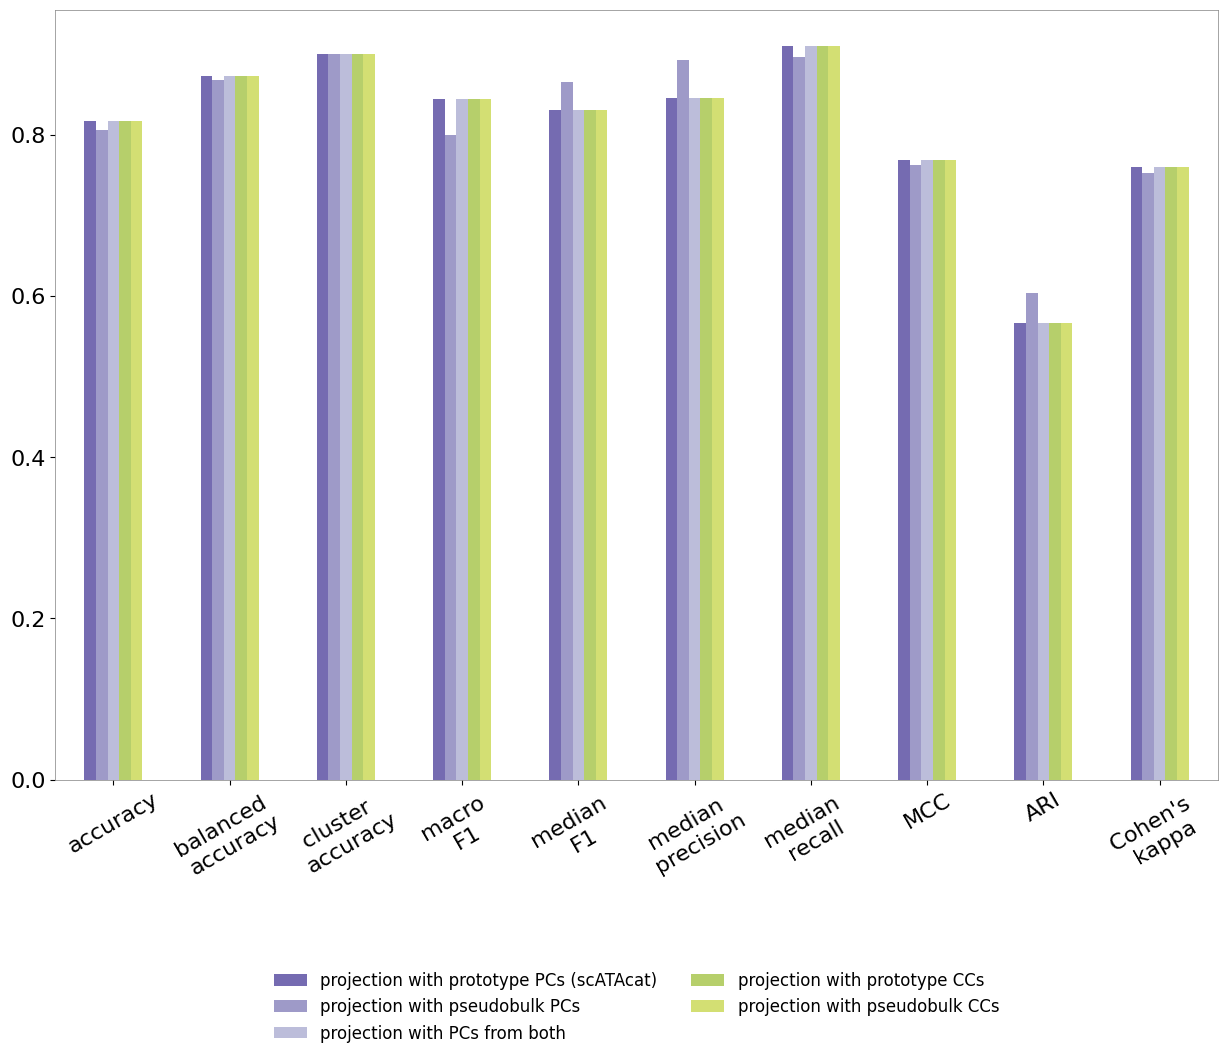

In [31]:
plot_performance_metrics(df = scores_df, save=True, tick_size=16, legend_fontsize=12, colors = ['#756bb1','#9e9ac8','#bcbddc','#B5CF6B','#D3DF73'],
                         legend_labels = ['projection with prototype PCs (scATAcat)' , 'projection with pseudobulk PCs',
                                          'projection with PCs from both', 'projection with prototype CCs','projection with pseudobulk CCs'], 
                         legend_bbox_to_anchor=(0.5, -0.23), legend_ncol=2,x_label_rotation = 30,save_path=figures_dir+ '/effect_of_embedding_type_and_direction.png')


In [32]:
scores_df.to_csv(figures_dir + "/effect_of_embedding_type_and_direction.csv")


## common cells pairwise common annotations

In [33]:

scores_df = pd.DataFrame(index=["projection_with_prototype_PCs","projection_with_pseudobulk_PC", "projection_with_PCs_from_both", "projection_with_prototype_CC","projection_with_pseudobulk_CC" ],
                        columns=["accuracy","balanced_accuracy","cluster_accuracy","macroF1_score","medianF1_score","medianPrecision_score","medianRecall_score","mathews_corr_coef_score","adjusted_rand_score","cohens_kappa_score"])
common_cells = get_common_cells(
    projection_with_pseudobulk_PCs_prototype_features,
    projection_with_prototype_PCs_prototype_features, 
    projection_with_PCs_from_both_prototype_features,projection_with_prototype_CC,
    projection_with_pseudobulk_CC,common_cells_across_methods)
all_methods_for_commonCells = get_combined_annotations_df_for_common_cells(
    projection_with_pseudobulk_PCs_prototype_features,
    projection_with_prototype_PCs_prototype_features,
    projection_with_PCs_from_both_prototype_features,
    projection_with_prototype_CC,
    projection_with_pseudobulk_CC,
    common_cells=common_cells,
    cell_ID_column="cell_IDs"
)
correct_id_col = 'ground_truth_annotations'
cluster_id_column =leiden_key
for method in scores_df.index:
    if method == "projection_with_pseudobulk_PC":
        common_annotations = list(set(all_methods_for_commonCells.ground_truth_annotations)
                                  &set(projection_with_pseudobulk_PCs_prototype_features.projection_with_pseudobulk_PC))
        all_methods_for_commonCells_commonAnnotations = all_methods_for_commonCells[all_methods_for_commonCells.ground_truth_annotations.isin(common_annotations)]
        annotation_df = all_methods_for_commonCells_commonAnnotations
        predicted_id_col = "projection_with_pseudobulk_PC"
        scores_df.loc["projection_with_pseudobulk_PC", "accuracy"] = get_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_PC", "balanced_accuracy"] = get_balanced_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_PC", "cluster_accuracy"] =  get_cluster_accuracy(annotation_df = annotation_df, cluster_id_column =cluster_id_column,correct_id_col=correct_id_col, predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_PC", "macroF1_score"] = get_macroF1_score(annotation_df = annotation_df, correct_id_col=correct_id_col, predicted_id_col=predicted_id_col, label_list=None)
        scores_df.loc["projection_with_pseudobulk_PC", "medianF1_score"] = get_medianF1_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_PC", "medianPrecision_score"] = get_medianPrecision_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_PC", "medianRecall_score"] =  get_medianRecall_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_PC", "mathews_corr_coef_score"] = get_mathews_corr_coef_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_PC", "adjusted_rand_score"] = get_adjusted_rand_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_PC", "cohens_kappa_score"] =  get_cohens_kappa_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
    if method == "projection_with_PCs_from_both":
        common_annotations = list(set(all_methods_for_commonCells.ground_truth_annotations)
                                  &set(projection_with_PCs_from_both_prototype_features.projection_with_PCs_from_both))
        all_methods_for_commonCells_commonAnnotations = all_methods_for_commonCells[all_methods_for_commonCells.ground_truth_annotations.isin(common_annotations)]
        annotation_df = all_methods_for_commonCells_commonAnnotations
        print(common_annotations)
        predicted_id_col = "projection_with_PCs_from_both"
        scores_df.loc["projection_with_PCs_from_both", "accuracy"] = get_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_PCs_from_both", "balanced_accuracy"] = get_balanced_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_PCs_from_both", "cluster_accuracy"] =  get_cluster_accuracy(annotation_df = annotation_df, cluster_id_column =cluster_id_column,correct_id_col=correct_id_col, predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_PCs_from_both", "macroF1_score"] = get_macroF1_score(annotation_df = annotation_df, correct_id_col=correct_id_col, predicted_id_col=predicted_id_col, label_list=None)
        scores_df.loc["projection_with_PCs_from_both", "medianF1_score"] = get_medianF1_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_PCs_from_both", "medianPrecision_score"] = get_medianPrecision_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_PCs_from_both", "medianRecall_score"] =  get_medianRecall_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_PCs_from_both", "mathews_corr_coef_score"] = get_mathews_corr_coef_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_PCs_from_both", "adjusted_rand_score"] = get_adjusted_rand_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_PCs_from_both", "cohens_kappa_score"] =  get_cohens_kappa_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
    if method == "projection_with_prototype_PCs":
        common_annotations = list(set(all_methods_for_commonCells.ground_truth_annotations)
                                  &set(projection_with_prototype_PCs_prototype_features.projection_with_prototype_PCs))
        all_methods_for_commonCells_commonAnnotations = all_methods_for_commonCells[all_methods_for_commonCells.ground_truth_annotations.isin(common_annotations)]
        annotation_df = all_methods_for_commonCells_commonAnnotations
        print(common_annotations)
        predicted_id_col = "projection_with_prototype_PCs"
        scores_df.loc["projection_with_prototype_PCs", "accuracy"] = get_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_PCs", "balanced_accuracy"] = get_balanced_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_PCs", "cluster_accuracy"] =  get_cluster_accuracy(annotation_df = annotation_df, cluster_id_column =cluster_id_column,correct_id_col=correct_id_col, predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_PCs", "macroF1_score"] = get_macroF1_score(annotation_df = annotation_df, correct_id_col=correct_id_col, predicted_id_col=predicted_id_col, label_list=None)
        scores_df.loc["projection_with_prototype_PCs", "medianF1_score"] = get_medianF1_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_PCs", "medianPrecision_score"] = get_medianPrecision_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_PCs", "medianRecall_score"] =  get_medianRecall_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_PCs", "mathews_corr_coef_score"] = get_mathews_corr_coef_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_PCs", "adjusted_rand_score"] = get_adjusted_rand_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_PCs", "cohens_kappa_score"] =  get_cohens_kappa_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
    if method == "projection_with_prototype_CC":
        common_annotations = list(set(all_methods_for_commonCells.ground_truth_annotations)
                                  &set(projection_with_prototype_CC.CC_prototype_annotation))
        all_methods_for_commonCells_commonAnnotations = all_methods_for_commonCells[all_methods_for_commonCells.ground_truth_annotations.isin(common_annotations)]
        annotation_df = all_methods_for_commonCells_commonAnnotations
        print(common_annotations)
        predicted_id_col = "CC_prototype_annotation"
        scores_df.loc["projection_with_prototype_CC", "accuracy"] = get_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_CC", "balanced_accuracy"] = get_balanced_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_CC", "cluster_accuracy"] =  get_cluster_accuracy(annotation_df = annotation_df, cluster_id_column =cluster_id_column,correct_id_col=correct_id_col, predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_CC", "macroF1_score"] = get_macroF1_score(annotation_df = annotation_df, correct_id_col=correct_id_col, predicted_id_col=predicted_id_col, label_list=None)
        scores_df.loc["projection_with_prototype_CC", "medianF1_score"] = get_medianF1_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_CC", "medianPrecision_score"] = get_medianPrecision_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_CC", "medianRecall_score"] =  get_medianRecall_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_CC", "mathews_corr_coef_score"] = get_mathews_corr_coef_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_CC", "adjusted_rand_score"] = get_adjusted_rand_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_prototype_CC", "cohens_kappa_score"] =  get_cohens_kappa_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
    if method == "projection_with_pseudobulk_CC":
        common_annotations = list(set(all_methods_for_commonCells.ground_truth_annotations)
                                  &set(projection_with_pseudobulk_CC.CC_pseudobulk_annotation))
        all_methods_for_commonCells_commonAnnotations = all_methods_for_commonCells[all_methods_for_commonCells.ground_truth_annotations.isin(common_annotations)]
        annotation_df = all_methods_for_commonCells_commonAnnotations
        print(common_annotations)
        predicted_id_col = "CC_pseudobulk_annotation"
        scores_df.loc["projection_with_pseudobulk_CC", "accuracy"] = get_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_CC", "balanced_accuracy"] = get_balanced_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_CC", "cluster_accuracy"] =  get_cluster_accuracy(annotation_df = annotation_df, cluster_id_column =cluster_id_column,correct_id_col=correct_id_col, predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_CC", "macroF1_score"] = get_macroF1_score(annotation_df = annotation_df, correct_id_col=correct_id_col, predicted_id_col=predicted_id_col, label_list=None)
        scores_df.loc["projection_with_pseudobulk_CC", "medianF1_score"] = get_medianF1_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_CC", "medianPrecision_score"] = get_medianPrecision_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_CC", "medianRecall_score"] =  get_medianRecall_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_CC", "mathews_corr_coef_score"] = get_mathews_corr_coef_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_CC", "adjusted_rand_score"] = get_adjusted_rand_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
        scores_df.loc["projection_with_pseudobulk_CC", "cohens_kappa_score"] =  get_cohens_kappa_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)


['LMPP', 'CLP', 'GMP', 'CMP', 'HSC/MPP', 'MEP']
['LMPP', 'CLP', 'GMP', 'CMP', 'HSC/MPP', 'MEP']
['LMPP', 'CLP', 'GMP', 'CMP', 'HSC/MPP', 'MEP']
['LMPP', 'CLP', 'GMP', 'CMP', 'HSC/MPP', 'MEP']


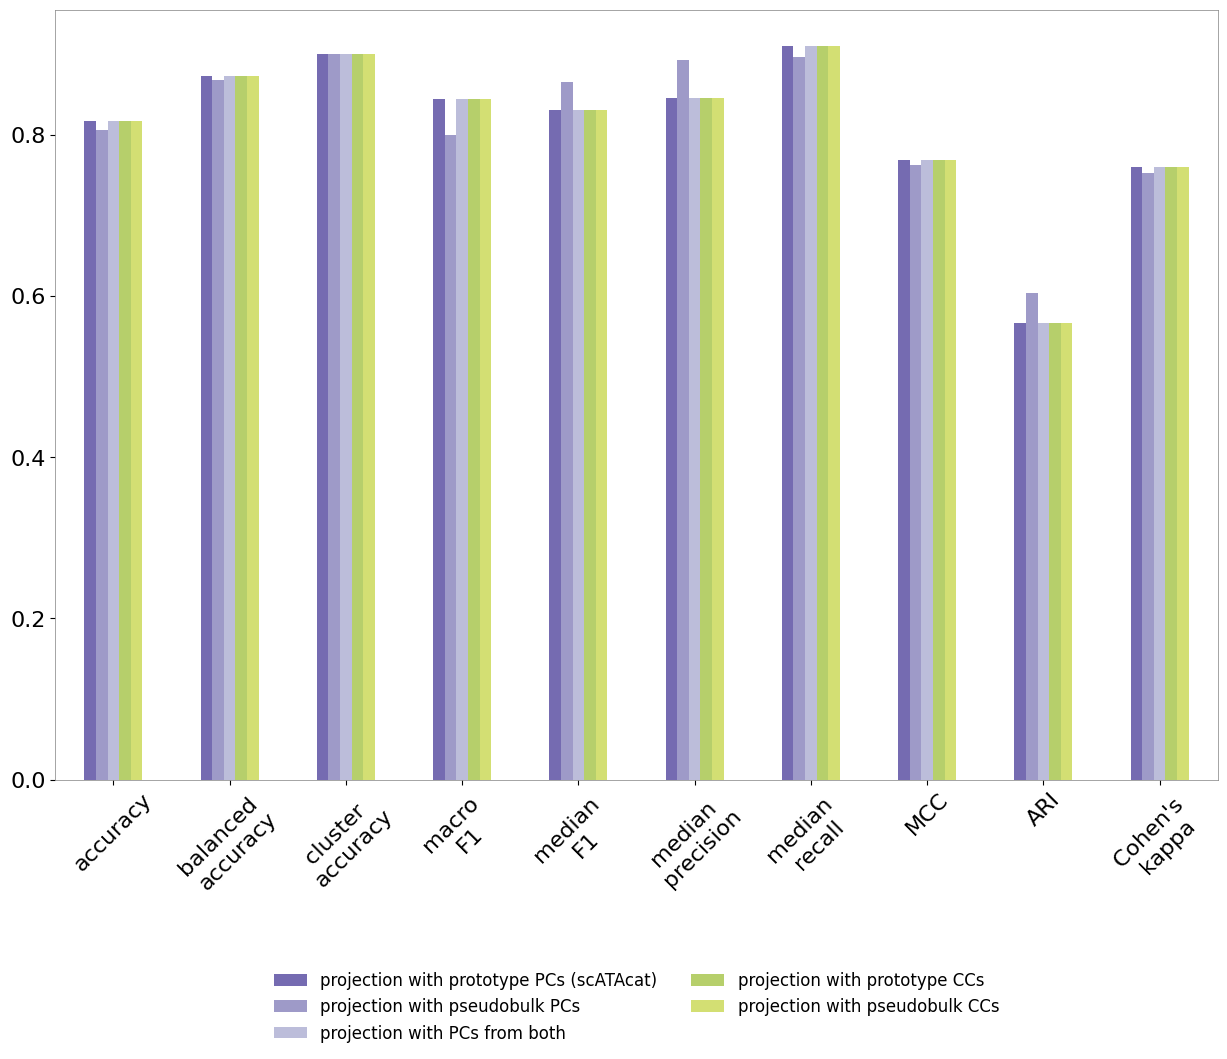

In [35]:
plot_performance_metrics(df = scores_df, save=True, tick_size=16, legend_fontsize=12, colors = ['#756bb1','#9e9ac8','#bcbddc','#B5CF6B','#D3DF73'],
                         legend_labels = ['projection with prototype PCs (scATAcat)' , 'projection with pseudobulk PCs',
                                          'projection with PCs from both', 'projection with prototype CCs','projection with pseudobulk CCs'], 
                         legend_bbox_to_anchor=(0.5, -0.23), legend_ncol=2,save_path=figures_dir+ '/effect_of_embedding_type_and_direction_pairwise_unified_annotations.png')


In [36]:
scores_df.to_csv(figures_dir + "/effect_of_embedding_type_and_direction_pairwise.csv")
